# Project 3

Import some libraries and the datasets

In [91]:
import numpy as np
import pandas as pd
from matplotlib.pyplot import subplots
import sklearn.model_selection as skm
from sklearn.model_selection import cross_val_score
from sklearn.experimental import enable_halving_search_cv # because it is experimental we need this
from sklearn.model_selection import GridSearchCV, HalvingGridSearchCV
from ISLP import load_data, confusion_table
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, log_loss, confusion_matrix)
from sklearn.ensemble import (RandomForestRegressor, RandomForestClassifier)
from sklearn.inspection import permutation_importance
from sklearn.tree import export_graphviz
from IPython.display import Image, Markdown
import graphviz
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statistics
import re

In [52]:
# main dataset
data_index_2 = pd.read_csv('../Project_datasets/data_index_2.csv', quotechar="'")
data_index_2 = data_index_2.drop(columns=['Unnamed: 0'])
data_index_2.set_index(['Lon','Lat'])
# no idea what this is
#data_index_example = pd.read_csv('../Project_datasets/data_index - example.csv')
LPJ_GUESS_output = pd.read_csv('../Project_datasets/LPJ-GUESS_output_BERN1.csv')
# precipitation by day and statistics
Predaymean = pd.read_csv('../Project_datasets/Predaymean1961_1990.csv')
Predaymean_statistics = pd.read_csv('../Project_datasets/Predaymean1961_1990_statics.csv')
# maximum temperature by day and statistics
Tmaxdaymean = pd.read_csv('../Project_datasets/Tmaxdaymean1961_1990.csv')
Tmaxdaymean_statistics = pd.read_csv('../Project_datasets/Tmaxdaymean1961_1990_statics.csv')
# minimum temperature by day and statistics
Tmindaymean = pd.read_csv('../Project_datasets/Tmindaymean1961_1990.csv')
Tmindaymean_statistics = pd.read_csv('../Project_datasets/Tmindaymean1961_1990_statics.csv')
# mean temperature by day and statistics
Tmpdaymean = pd.read_csv('../Project_datasets/Tmpdaymean1961_1990.csv')
Tmpdaymean_statistics = pd.read_csv('../Project_datasets/Tmpdaymean1961_1990_statics.csv')
# shortwave radiation flux
Tswrfdaymean = pd.read_csv('../Project_datasets/Tswrfdaymean1961_1990.csv')
Tswrfdaymean_statistics = pd.read_csv('../Project_datasets/Tswrfdaymean1961_1990_statics.csv')

Text file

In [3]:
gridlist_pan_gfed_ISO3_UN = open('../Project_datasets/gridlist_pan_gfed_ISO3_UN.txt','r')

Show the first entries

### Main Data set

Short legend about the colums: 

Lon: Longitude<br>
Lat: Latidude

stuff about the souil texture: <br>

clay: Clay in %<br>
silt: Silt in % (sedimentary deposit that is formed when a river deposits the material it is carrying)<br>
slay: slay in %(soil in eg. rainforest) <br>
sand: sand in % %<br>
orC: organic carbondioxid in %<br>
CN: Cyanide in %<br>
pH: pH<br>
cell fraction: portion of cells / organic material in soil in % <br>


Allways with season: Same as the tables below.

tmax: maximum temperatur in K <br>
tmin: min temperature in K <br>
tmp:mean temperature in K <br>
Pre: Precipitation, mm day-1 <br>
tswrf: Total shortwave radiation flux, W m-2


This is the GUESS output: 

NPP: net primary productivity (kg C m-2 year-1)<br>
SoilR: soil respiration (kg C m-2 year-1)<br>
MaxBiomeCmass: The maximum biomass from a single biome (kg C m-2)<br>
MxbiomeLAI: The maximum leaf area index from a single biome (unitless)<br>
VegC: Vegetation carbon poo (kg C m-2)l<br>
LitterC: Litter carbon pool (kg C m-2)<br>
SoilC: Soil carbon pool (kg C m-2)<br>
Biome_Cmass: The biome type based on the maximum biomass (category)<br>
Biome_LAI: The biome type based on the maximum LAI (category)<br>
Biome_obs: The observed biome type (category)<br>

Country codes

GFED-region: Global Fire Emissions Database (https://www.un-spider.org/global-fire-emissions-database-gfed) <br>
Pan_2007: Big reogion (Europa, Africa, Australia, USA, Russia, China, .... )<br>
ISO3: Abbreviation for country <br>
UN: Country code

In [53]:
print(f'shape: {data_index_2.shape}')
data_index_2.head()

shape: (59191, 83)


,Lon,Lat,clay,silt,sand,orgC,CN,pH,cellfraction,tmax_SpringMean,...,VegC,LitterC,SoilC,Biome_Cmax,Biome_LAI,Biome_obs,GFED-region,Pan_2007,ISO3,UN
0,-179.75,71.25,0.08,0.37,0.55,0.020,11.0,5.9,0.482,249.88,...,0.0,0.000,0.000,13,13,17,10,Russia,RUS,643
1,-179.75,68.75,0.20,0.48,0.32,0.031,17.0,6.3,0.753,250.64,...,0.0,0.003,0.015,13,11,17,10,Russia,RUS,643
2,-179.75,68.25,0.20,0.48,0.32,0.031,17.0,6.3,0.447,249.84,...,0.0,0.006,0.022,13,11,17,10,Russia,RUS,643
3,-179.75,67.75,0.20,0.48,0.32,0.031,17.0,6.3,0.526,250.84,...,0.0,0.002,0.020,13,11,17,10,Russia,RUS,643
4,-179.75,67.25,0.20,0.48,0.32,0.031,17.0,6.3,0.422,251.42,...,0.0,0.003,0.016,13,11,17,10,Russia,RUS,643


In [5]:
with open("../Project_datasets/Readme.txt",'r') as script:
    speech = script.read().splitlines()

count = 1
for line in speech:
    if False:
        count+=1
        if count % 2 == 0: #this is the remainder operator
            print(line)
    else:
        print(line)

data information:
1. There are five climate variables which are daily average values during 1961-1990. They are Tswrf (Total shortwave radiation flux, W m-2), Pre (Precipitation, mm day-1), Tmp (Daily mean temperature, K), 
Tmax (Daily maximum temperature, K), and Tmin (Daily minimum temperature, K). 

2. In the file LPJ-GUESS_output BERN1.csv, the following variables are collected:
NPP: net primary productivity (kg C m-2 year-1)
SoilR: soil respiration (kg C m-2 year-1)
MaxBiomeCmass: The maximum biomass from a single biome (kg C m-2)
MxbiomeLAI: The maximum leaf area index from a single biome (unitless)
VegC: Vegetation carbon poo (kg C m-2)l
LitterC: Litter carbon pool (kg C m-2)
SoilC: Soil carbon pool (kg C m-2)
Biome_Cmass: The biome type based on the maximum biomass (category)
Biome_LAI: The biome type based on the maximum LAI (category)
Biome_obs: The observed biome type (category)

3. legend of biome

4. soilmap_center_interpolated.dat: the texture inforamtion for each grid ce

### LPJ_Guess_output


In [6]:
print(f'shape: {LPJ_GUESS_output.shape}')
LPJ_GUESS_output.head()

shape: (59191, 12)


,Lon,Lat,NPP,SoilR,MaxBiomeCmax,MaxBiomeLAI,VegC,LitterC,SoilC,Biome_Cmax,Biome_LAI,Biome_obs
0,39.75,-1.25,0.429,0.390,0.449,1.9821,1.225,0.758,5.941,8,12,12
1,150.25,-34.25,0.554,0.451,6.883,3.3174,6.953,3.221,10.566,7,7,6
2,-63.75,82.75,0.000,0.000,0.000,0.0000,0.000,0.003,0.002,13,13,17
3,59.25,30.75,0.043,0.042,0.090,0.2146,0.127,0.084,0.543,7,11,14
4,24.25,27.75,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,13,13,17


### Pred (Precipitation, mm day-1)
 

In [7]:
print(f'shape: {Predaymean.shape}')
Predaymean.head()

shape: (59191, 367)


,Lon,Lat,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,...,Day356,Day357,Day358,Day359,Day360,Day361,Day362,Day363,Day364,Day365
0,39.75,-1.25,0.634400,0.838580,1.373300,1.487800,0.948640,0.705560,0.790570,0.69274,...,1.260600,1.011600,2.676200,2.146300,0.83299,0.97611,1.092800,2.015100,1.220200,1.064100
1,150.25,-34.25,3.176800,3.282800,4.271300,2.735100,3.118300,1.863200,2.245400,1.81270,...,1.243100,2.901500,1.580400,2.788500,3.62270,2.12350,2.546700,2.624700,1.521800,2.259400
2,-63.75,82.75,0.191720,0.553370,0.559100,0.350270,0.414340,0.239620,0.215600,0.39415,...,0.286600,0.187410,0.352480,0.303120,0.37439,0.29827,0.399200,0.162680,0.180370,0.251560
3,59.25,30.75,0.272920,0.576200,1.529900,0.475970,0.809060,0.772860,0.773340,0.12219,...,0.315400,0.223630,0.009584,0.004932,0.65535,1.25430,0.680690,0.534400,0.225750,0.281360
4,24.25,27.75,0.012822,0.044511,0.027133,0.003318,0.007306,0.014162,0.085964,0.01347,...,0.029099,0.040272,0.030631,0.000518,0.00058,0.12653,0.010889,0.002139,0.003662,0.009687


In [8]:
print(f'shape: {Predaymean_statistics.shape}')
Predaymean_statistics.head()

shape: (59191, 14)


,Lon,Lat,SpringMean,SpringMedian,SpringStd,SummerMean,SummerMedian,SummerStd,FallMean,FallMedian,FallStd,WinterMean,WinterMedian,WinterStd
0,39.75,-1.25,0.870380,0.693390,0.641700,1.622500,1.30490,1.11930,0.528780,0.450650,0.315910,2.049600,1.836000,1.289100
1,150.25,-34.25,3.251700,2.971600,1.559000,2.418500,2.07100,1.51770,1.725700,1.331900,1.054600,2.547500,2.358200,1.253600
2,-63.75,82.75,0.234270,0.209640,0.139210,0.333730,0.31885,0.18320,0.758070,0.735040,0.338730,0.325480,0.296160,0.154960
3,59.25,30.75,0.715820,0.592520,0.423350,0.136010,0.03079,0.17825,0.005847,0.000000,0.020282,0.180990,0.045619,0.278850
4,24.25,27.75,0.045284,0.015422,0.070006,0.061916,0.01050,0.10039,0.004480,0.000016,0.022542,0.028823,0.006414,0.055641


### Tmp (Daily mean temperature, K)

In [9]:
print(f'shape: {Tmpdaymean.shape}')
Tmpdaymean.head()

shape: (59191, 367)


,Lon,Lat,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,...,Day356,Day357,Day358,Day359,Day360,Day361,Day362,Day363,Day364,Day365
0,39.75,-1.25,301.11,301.14,301.07,300.95,301.14,301.32,301.33,301.33,...,301.49,301.63,301.19,301.11,301.15,301.39,301.33,301.40,301.49,301.39
1,150.25,-34.25,293.59,293.28,293.53,292.33,292.28,292.75,292.78,293.84,...,293.04,292.88,292.75,293.03,292.37,292.62,293.36,292.90,293.58,292.72
2,-63.75,82.75,241.33,242.18,242.51,241.94,241.99,241.18,240.35,240.29,...,242.67,243.21,244.22,243.65,242.88,241.99,243.01,243.91,244.09,243.10
3,59.25,30.75,281.13,281.06,281.34,282.07,281.57,281.56,282.13,282.14,...,283.05,282.85,282.33,281.68,281.74,281.59,281.69,281.00,281.42,281.48
4,24.25,27.75,285.84,285.50,285.25,285.06,284.62,285.04,285.01,284.48,...,285.96,285.78,285.66,285.68,285.39,285.57,285.62,285.71,285.71,285.66


In [10]:
print(f'shape: {Tmpdaymean_statistics.shape}')
Tmpdaymean_statistics.head()

shape: (59191, 14)


,Lon,Lat,SpringMean,SpringMedian,SpringStd,SummerMean,SummerMedian,SummerStd,FallMean,FallMedian,FallStd,WinterMean,WinterMedian,WinterStd
0,39.75,-1.25,302.34,302.33,0.6554,301.21,301.20,1.3120,299.60,299.65,0.46193,301.42,301.39,0.44815
1,150.25,-34.25,292.82,292.97,1.1691,284.64,284.10,2.7774,282.29,281.50,1.80220,289.77,289.76,2.17460
2,-63.75,82.75,240.12,240.07,1.2096,260.31,261.44,10.1770,271.20,274.13,5.88880,247.77,245.76,4.80570
3,59.25,30.75,285.40,284.89,3.3975,299.63,300.13,4.0871,302.39,303.13,2.64690,288.71,287.35,4.84480
4,24.25,27.75,287.69,287.32,2.6203,299.53,299.15,2.9706,301.97,302.61,1.34370,291.17,290.75,4.37740


### Tmax

In [11]:
print(f'shape: {Tmaxdaymean.shape}')
Tmaxdaymean.head()

shape: (59191, 367)


,Lon,Lat,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,...,Day356,Day357,Day358,Day359,Day360,Day361,Day362,Day363,Day364,Day365
0,39.75,-1.25,302.63,302.91,302.83,302.43,302.76,302.99,302.95,303.04,...,302.96,303.14,302.65,302.49,302.66,302.87,302.73,302.76,302.99,302.98
1,150.25,-34.25,296.43,296.09,295.97,294.85,294.73,295.55,295.77,296.80,...,296.44,296.16,295.83,296.28,295.14,295.86,296.45,296.14,296.54,294.66
2,-63.75,82.75,244.72,245.60,245.89,245.11,244.98,244.50,243.61,243.90,...,246.04,246.82,247.53,247.26,246.58,246.02,246.67,247.49,247.69,246.57
3,59.25,30.75,284.75,284.92,285.61,286.23,285.53,285.78,286.21,285.91,...,287.97,288.04,287.38,286.80,287.24,287.00,286.86,286.56,286.61,286.65
4,24.25,27.75,290.05,289.76,289.50,289.10,289.05,289.41,289.26,288.84,...,290.04,289.73,289.58,289.62,289.48,289.77,289.97,290.24,290.17,289.90


In [12]:
print(f'shape: {Tmaxdaymean_statistics.shape}')
Tmaxdaymean_statistics.head()

shape: (59191, 14)


,Lon,Lat,SpringMean,SpringMedian,SpringStd,SummerMean,SummerMedian,SummerStd,FallMean,FallMedian,FallStd,WinterMean,WinterMedian,WinterStd
0,39.75,-1.25,304.27,304.43,0.74315,302.40,302.40,1.0318,301.13,301.11,0.39706,302.66,302.62,0.4142
1,150.25,-34.25,295.36,295.46,1.20660,288.11,287.64,3.0125,285.74,284.94,1.78200,293.06,293.14,2.1944
2,-63.75,82.75,243.87,243.72,1.14260,263.31,264.06,9.1992,272.13,274.69,5.69120,250.88,249.34,4.3383
3,59.25,30.75,288.82,287.81,3.27200,304.98,306.09,4.5394,307.99,308.63,2.57240,294.33,293.13,5.0202
4,24.25,27.75,291.96,291.66,2.65600,303.90,303.83,3.3008,306.28,306.87,1.23550,295.48,295.23,4.3877


### Tmin

In [13]:
print(f'shape: {Tmindaymean.shape}')
Tmindaymean.head()

shape: (59191, 367)


,Lon,Lat,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,...,Day356,Day357,Day358,Day359,Day360,Day361,Day362,Day363,Day364,Day365
0,39.75,-1.25,296.63,296.49,296.55,296.51,296.69,296.64,296.68,296.74,...,296.54,296.48,296.30,296.23,296.26,296.29,296.46,296.43,296.55,296.83
1,150.25,-34.25,290.14,289.85,289.86,288.98,288.74,289.37,289.22,290.43,...,289.51,289.81,289.54,289.99,289.32,289.53,290.06,289.90,290.14,289.41
2,-63.75,82.75,240.80,241.47,241.86,241.37,241.49,240.74,239.82,239.64,...,241.86,242.46,243.48,242.96,242.10,241.31,242.23,243.03,242.98,242.13
3,59.25,30.75,278.46,278.36,278.70,279.43,279.03,279.01,279.38,279.36,...,278.97,278.82,278.43,278.07,277.74,277.97,277.98,277.51,277.71,277.86
4,24.25,27.75,284.46,283.98,283.83,283.46,283.21,283.67,283.66,283.15,...,284.47,284.35,284.12,284.14,283.96,284.09,284.21,284.29,284.28,284.57


In [14]:
print(f'shape: {Tmindaymean_statistics.shape}')
Tmindaymean_statistics.head()

shape: (59191, 14)


,Lon,Lat,SpringMean,SpringMedian,SpringStd,SummerMean,SummerMedian,SummerStd,FallMean,FallMedian,FallStd,WinterMean,WinterMedian,WinterStd
0,39.75,-1.25,298.06,298.41,0.85947,297.03,297.02,0.77132,295.42,295.38,0.19342,296.47,296.48,0.32203
1,150.25,-34.25,288.99,289.28,1.23520,280.58,280.14,2.60160,278.59,277.94,2.10780,286.79,287.04,2.03760
2,-63.75,82.75,239.70,239.61,1.13850,259.44,260.53,10.01100,268.84,272.09,5.76450,246.56,244.91,4.44050
3,59.25,30.75,282.46,281.83,3.41820,297.17,298.07,3.95480,299.81,300.63,2.58780,285.18,283.81,5.08320
4,24.25,27.75,285.68,285.31,2.18730,296.19,296.15,2.91960,298.87,299.31,1.03790,289.35,289.10,4.03760


### Tswrf (Total shortwave radiation flux, W m-2)

In [15]:
print(f'shape: {Tswrfdaymean.shape}')
Tswrfdaymean.head()

shape: (59191, 367)


,Lon,Lat,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,...,Day356,Day357,Day358,Day359,Day360,Day361,Day362,Day363,Day364,Day365
0,39.75,-1.25,231.59,219.87,236.62,238.73,239.37,250.71,236.94,236.88,...,205.60,223.60,195.67,198.74,203.09,193.82,210.05,199.19,223.03,220.83
1,150.25,-34.25,306.97,311.71,310.55,311.11,311.43,304.95,312.76,312.54,...,305.95,301.99,296.33,301.22,287.30,293.39,301.39,296.81,296.34,279.91
2,-63.75,82.75,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,59.25,30.75,133.78,137.99,136.90,126.10,145.59,132.06,136.92,132.72,...,145.09,125.97,127.70,125.30,137.31,113.15,117.91,131.45,134.91,128.61
4,24.25,27.75,144.89,153.19,155.81,165.83,163.23,163.97,153.20,162.64,...,144.84,150.68,153.20,151.03,158.60,153.69,153.10,160.78,152.35,146.26


In [16]:
print(f'shape: {Tswrfdaymean_statistics.shape}')
Tswrfdaymean_statistics.head()

shape: (59191, 14)


,Lon,Lat,SpringMean,SpringMedian,SpringStd,SummerMean,SummerMedian,SummerStd,FallMean,FallMedian,FallStd,WinterMean,WinterMedian,WinterStd
0,39.75,-1.25,245.3500,243.31,12.278,224.76,223.69,14.020,212.13,209.70,17.828,230.61000,233.69,13.8210
1,150.25,-34.25,273.2400,280.66,31.715,143.77,134.31,30.976,168.57,159.00,40.282,277.94000,279.75,26.3640
2,-63.75,82.75,6.8325,0.00,14.407,214.38,238.73,68.931,140.85,142.78,85.973,0.43718,0.00,1.5824
3,59.25,30.75,176.1900,170.71,37.004,312.30,323.65,34.345,286.04,287.80,31.122,160.32000,153.34,34.7040
4,24.25,27.75,207.9700,200.82,38.315,308.44,311.95,20.496,302.93,307.45,23.021,189.10000,185.46,32.6170


### County List and binome legend

In [17]:
# Read the data from file into a list-of-lists table.
with open('../Project_datasets/gridlist_pan_gfed_ISO3_UN.txt') as file:
    datatable = [line.split() for line in file.read().splitlines()]

country_codes = pd.DataFrame(datatable, columns = ['Lon', 'Lat', 'GFED-region', 'Pan_2007', 'ISO3', 'UN'] )  
country_codes = country_codes.drop(index = 0)
country_codes.head()

,Lon,Lat,GFED-region,Pan_2007,ISO3,UN
1,-69.75,-55.25,5,Americas,CHL,152
2,-69.25,-55.25,5,Americas,CHL,152
3,-71.25,-54.75,5,Americas,CHL,152
4,-70.75,-54.75,5,Americas,CHL,152
5,-70.25,-54.75,5,Americas,CHL,152


In [18]:
    
with open("../Project_datasets/legend of biomes.txt",'r') as script:
    speech = script.read().splitlines()

count = 1
for line in speech:
    if True:
        count+=1
        if count % 2 == 0: #this is the remainder operator
            print(line)
    else:
        print(line)

1 Boreal decid forest
2 Boreal ever forest
3 Temp/boreal mix fo.
4 Temp conifer forest
5 Temp decid forest
6 Temp broad ever fo.
7 Temp mixed forest
8 Trop season forest
9 Trop rain forest
10 Trop decid forest
11 Moist savannas
12 Dry savannas
13 Tall grassland
14 Dry grassland
15 Xeric wood/shrub
16 Arid shrub/steppe
17 Desert
18 Arctic/alpine tundra


## Section 2: Visualisation


In [19]:
print(data_index_2.describe())

                Lon           Lat          clay          silt          sand  \
count  59191.000000  59191.000000  59191.000000  59191.000000  59191.000000   
mean      20.469932     30.797541      0.226424      0.280915      0.492662   
std       85.694107     31.484488      0.106558      0.109771      0.165724   
min     -179.750000    -55.250000      0.040000      0.050000      0.170000   
25%      -63.250000      7.750000      0.170000      0.200000      0.380000   
50%       30.250000     37.750000      0.230000      0.300000      0.450000   
75%       93.750000     57.250000      0.270000      0.330000      0.570000   
max      179.750000     83.250000      0.540000      0.610000      0.900000   

               orgC            CN            pH  cellfraction  \
count  59191.000000  59190.000000  59190.000000  59190.000000   
mean       0.022554     12.038250      6.329958      0.520901   
std        0.056028      2.444517      1.188566      0.167647   
min        0.002000      9.0

Countplot to count the number of data for each biom: 

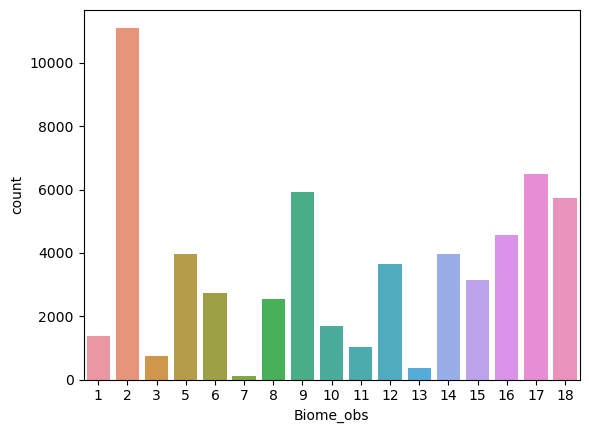

In [20]:
# create lineplot 
g = sns.countplot(data_index_2, x = "Biome_obs")

Scatter plott - Biome_LAI: The biome type based on the maximum LAI (category)

<Axes: xlabel='MaxBiomeLAI', ylabel='Biome_obs'>

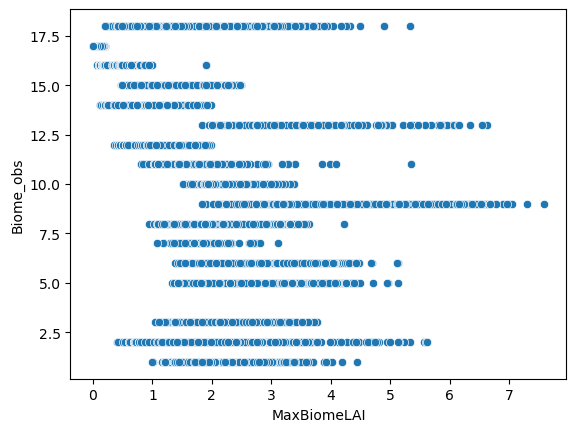

In [21]:
sns.scatterplot(data_index_2, x = "MaxBiomeLAI", y = "Biome_obs")

Scatterplott - Biome_Cmass: The biome type based on the maximum biomass (category)

<Axes: xlabel='MaxBiomeCmax', ylabel='Biome_obs'>

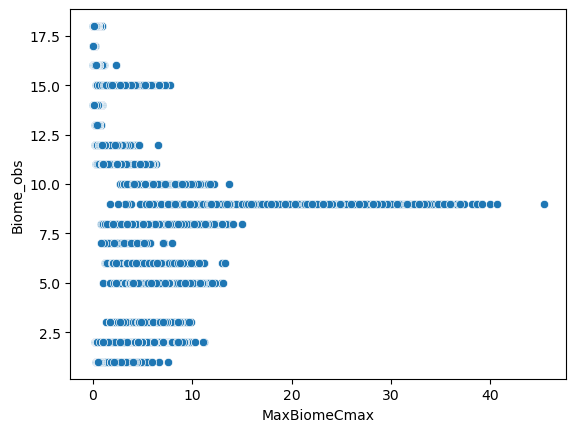

In [22]:
sns.scatterplot(data_index_2, x = "MaxBiomeCmax", y = "Biome_obs")

<Axes: xlabel='Lon', ylabel='Lat'>

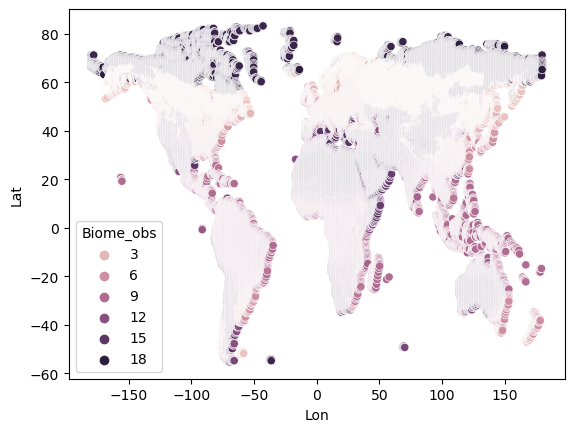

In [23]:
sns.scatterplot(data_index_2, x="Lon", y="Lat", hue="Biome_obs")

 ## Some preparations

### number of samples of different biomes in different coutries

In [24]:
countrys_sample_size = data_index_2.groupby(['ISO3', 'Biome_obs']).size()   ##### NOT TESTED
#countrys_sample_size = pd.DataFrame(countrys_sample_size)
#countrys_sample_size.columns = [ "Size"]           # Maybe solve later
countrys_sample_size.head()

ISO3   Biome_obs
'AGO'  6              3
       8            187
       9             25
       10            88
       11             7
dtype: int64

In [25]:
# Samply size for countries
countrys_sample_size.at["'EGY'"]


Biome_obs
14     34
16     34
17    292
dtype: int64

## Section 3: Binary classification

We saw that `NaN` appeard somewhere in `data_index_2`. The following is to find out where it occurs.

In [26]:
print(list(data_index_2.loc[:,data_index_2.isna().any()]))
data_index_2[data_index_2.isna().any(axis=1)]

['CN', 'pH', 'cellfraction']


,Lon,Lat,clay,silt,sand,orgC,CN,pH,cellfraction,tmax_SpringMean,...,VegC,LitterC,SoilC,Biome_Cmax,Biome_LAI,Biome_obs,GFED-region,Pan_2007,ISO3,UN
59182,179.75,71.25,0.08,0.37,0.55,0.02,NaN,NaN,NaN,249.45,...,0.0,0.0,0.001,13,13,17,0,[],[],0


Choose countries. Random.org gave us the biomes
- 17: desert
- 16: Arid shrub/steppe

In [65]:
biome_list = [17,16] # our chosen biomes

Countplot: 

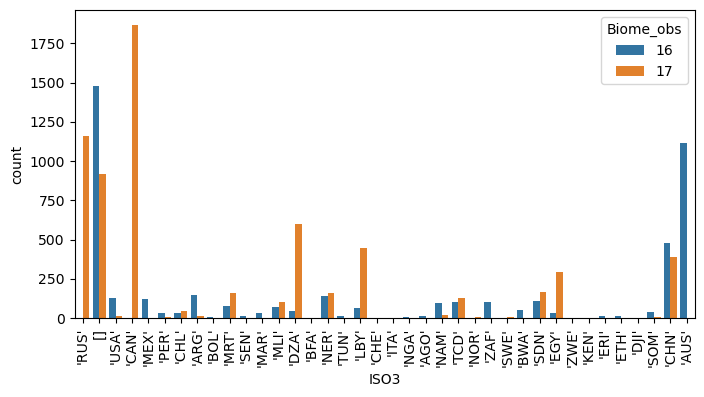

In [28]:
relevant_data = data_index_2.loc[data_index_2['Biome_obs'].isin(biome_list)]
relevant_data = relevant_data[~(relevant_data.isna().any(axis=1))] # delete rows with NaN
fig, ax = plt.subplots(figsize = (8,4))
ax = sns.countplot( relevant_data, x = 'ISO3', hue = 'Biome_obs')
ax.tick_params(axis='x', rotation=90)

Thus we choose Egypt to train and China as test.

In [64]:
region_train = data_index_2['ISO3'] == 'EGY' # egypt is the chosen one
region_test = data_index_2['ISO3'] == 'CHN' # china is the chosen one

Here the action starts.

In [155]:
# the following function generates X_test, Y_test and X_train, Y_train for the binary classification
def model_create_XY(drop_columns=[], region_train=region_train, region_test=region_test, \
                     objective_list=biome_list, use_columns=None, objective='Biome_obs'):
      # restrict to two biomes, restrict to country codes, remove any rows with NaN
      relevant_data = data_index_2
      relevant_data = relevant_data.loc[data_index_2[objective].isin(objective_list)] # restrict given biomes
      relevant_data = relevant_data[~(relevant_data.isna().any(axis=1))] # delete rows with NaN
      relevant_data_train = relevant_data.loc[region_train] # restrict to training country
      relevant_data_test = relevant_data.loc[region_test] # restrict to test country

      # TODO: drop meadian (as it is close to mean)
      drop_columns += ['MaxBiomeLAI','Biome_obs','Biome_LAI','Biome_Cmax',
                       'Lon','Lat','Pan_2007','ISO3','UN','MaxBiomeCmax'] # drop these columns
      if use_columns:
            X_train = relevant_data_train[use_columns]
            X_test = relevant_data_test[use_columns]
      else:
            X_train = relevant_data_train.drop(columns=drop_columns)
            X_test = relevant_data_test.drop(columns=drop_columns)

      feature_names = list(X_train.columns)

      Y_train = relevant_data_train['Biome_obs'] # give True if it is the first biome in the list
      Y_test = relevant_data_test['Biome_obs'] # give True if it is the first biome in the list

      print(f"length of training data: {Y_train.shape[0]}")
      print(f"length of testing data: {Y_test.shape[0]}")

      return X_train, X_test, Y_train, Y_test, feature_names

Function for plotting (Permutation importance vs. purity importance)

In [153]:
def plot_permutation_importance(clf, X, y, ax):
    result = permutation_importance(clf, X, y, n_repeats=10, random_state=42, n_jobs=2)
    perm_sorted_idx = result.importances_mean.argsort()

    ax.boxplot(
        result.importances[perm_sorted_idx].T,
        vert=False,
        labels=X.columns[perm_sorted_idx],
    )
    ax.axvline(x=0, color="k", linestyle="--")
    return ax

Binary classification model

In [154]:
# the following generates, trains and evaluates the model
def model_train_evaluate(X_train, X_test, Y_train, Y_test, feature_names, hyperparameter_tuning=True):

    clf = RandomForestClassifier(random_state=0)
    
    if hyperparameter_tuning:
        kfold3 = skm.KFold(3,
                        random_state=1,
                        shuffle=True) # let's try fewer fold to save running time

        fineness = 3 # determines how many parameters should be tested
        params = {
                'max_depth': np.linspace(1, 10, fineness).astype('int'), # let's tune for only one parameters to save running time
                'n_estimators': np.linspace(10, 100, fineness).astype('int'), # CV number of trees (estimators) 10, 20, ..., 100
                }
        if False:
            rfc_gscv = GridSearchCV(clf, param_grid = params, scoring = "accuracy",
                                        cv = kfold3 )
        else:
            # Alternatively use HalvingGridSearchCV which is equally abismal in its performance
            rfc_gscv = HalvingGridSearchCV(clf, param_grid = params, scoring = "accuracy",
                                        cv = kfold3 )
        
        # Fit the model
        model_rfc = rfc_gscv.fit(X_train, Y_train)

        # Model best estimator
        max_depths=model_rfc.best_estimator_.get_params()["max_depth"]
        max_trees= model_rfc.best_estimator_.get_params()["n_estimators"]
        max_cvs= rfc_gscv.best_score_
        print("Max Depth: ", max_depths)
        print("Max Trees: ",max_trees)
        print("Max CV: ",max_cvs)

        clf = RandomForestClassifier(random_state=0, max_depth=max_depths, n_estimators=max_trees)

    clf.fit(X_train, Y_train)


    # Some performance 
    score_rfc_train = accuracy_score(Y_train, clf.predict(X_train))
    print('Accuracy of RandomForestClassifier on train data: {:.4f}'.format(score_rfc_train))
    kfold = skm.KFold(3, random_state=1, shuffle=True)
    # This becomes computationally quite expensive for large training sets
    scores_rfc_val = cross_val_score(clf, X_train, Y_train, cv=kfold)
    print("Accuracy RandomForestClassifier on cross validation: %0.4f ( %0.2f)" % (scores_rfc_val.mean(), scores_rfc_val.std()))
    score_rfc_test = accuracy_score(Y_test, clf.predict(X_test))
    print('Accuracy of RandomForestClassifier on test data: {:.4f}'.format(score_rfc_test))
    
    # confusion table
    display(Markdown('---\n The confusion table'))
    display(confusion_table(clf.predict(X_test),
                            Y_test))
    
    conftable = confusion_matrix(clf.predict(X_test), Y_test) # gives same results as confusion_table
    tp_and_fn = conftable.sum(0)
    tp_and_fp = conftable.sum(1)
    tp = conftable.diagonal()
    
    # Recall and precision
    display(Markdown('---\n Recall: proportion classified as True/ False of all True/Falls || [0,0]/ ([0,0] + [1,0]) || [1,1]/([0,1] + [1,1]'))
    recall = tp / tp_and_fn 
    print('along coulumns', '\nF:' , recall[0] ,'\nT:' , recall[1])
    display(Markdown('---\n Precission: proportion that werre True/ False of all samples predicted as True/ falls || [0,0]/ ([0,0] + [0,1]) || [1,1]/([1,0] + [1,1]'))
    precision = tp / tp_and_fp
    print('along rows','\nF:' , precision[0] ,'\nT:' , precision[1])
    
    # display importance table
    display(Markdown('---\n The feature importance'))
    feature_imp = pd.DataFrame(
    {'importance':clf.feature_importances_},
    index=feature_names)
    display(feature_imp.sort_values(by='importance', ascending=False))
    
    # Plot Impurity-based vs. Permutation importance
    mdi_importances = pd.Series(clf.feature_importances_, index=X_train.columns)
    # tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
    # tree_indices = np.arange(0, len(clf.feature_importances_)) + 0.5

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 12))
    mdi_importances.sort_values().plot.barh(ax=ax1)
    ax1.set_xlabel("Gini importance")
    plot_permutation_importance(clf, X_train, Y_train, ax2)
    ax2.set_xlabel("Decrease in accuracy score")
    fig.suptitle(
        "Impurity-based vs. permutation importances on multicollinear features (train set)"
    )
    _ = fig.tight_layout()
    
    display(Markdown('---'))

In [157]:
# run the training data, test data and the model
def model_run(drop_columns=[], region_train=region_train, \
               region_test=region_test, objective_list=biome_list, use_columns=None, \
                hyperparameter_tuning=False, objective='Biome_obs'):
    X_train, X_test, Y_train, Y_test, feature_names = model_create_XY(drop_columns, region_train, \
                        region_test, objective_list, use_columns, objective)

    model_train_evaluate(X_train, X_test, Y_train, Y_test, feature_names, hyperparameter_tuning)

length of training data: 326
length of testing data: 867


Max Depth:  10
Max Trees:  55
Max CV:  0.9628475827852775
Accuracy of RandomForestClassifier on train data: 1.0000
Accuracy RandomForestClassifier on cross validation: 0.9601 ( 0.04)
Accuracy of RandomForestClassifier on test data: 0.9769


---
 The confusion table

Truth,16,17
Predicted,,
16,477,19
17,1,370


---
 Recall: proportion classified as True/ False of all True/Falls || [0,0]/ ([0,0] + [1,0]) || [1,1]/([0,1] + [1,1]

along coulumns 
F: 0.997907949790795 
T: 0.9511568123393316


---
 Precission: proportion that werre True/ False of all samples predicted as True/ falls || [0,0]/ ([0,0] + [0,1]) || [1,1]/([1,0] + [1,1]

along rows 
F: 0.9616935483870968 
T: 0.9973045822102425


---
 The feature importance

,importance
SoilR,0.146881
VegC,0.086418
Pre_WinterMedian,0.049856
Pre_SpringMean,0.049256
tmp_FallMean,0.043278
...,...
clay,0.000499
GFED-region,0.000484
orgC,0.000397
tmax_SummerStd,0.000000


KeyboardInterrupt: 

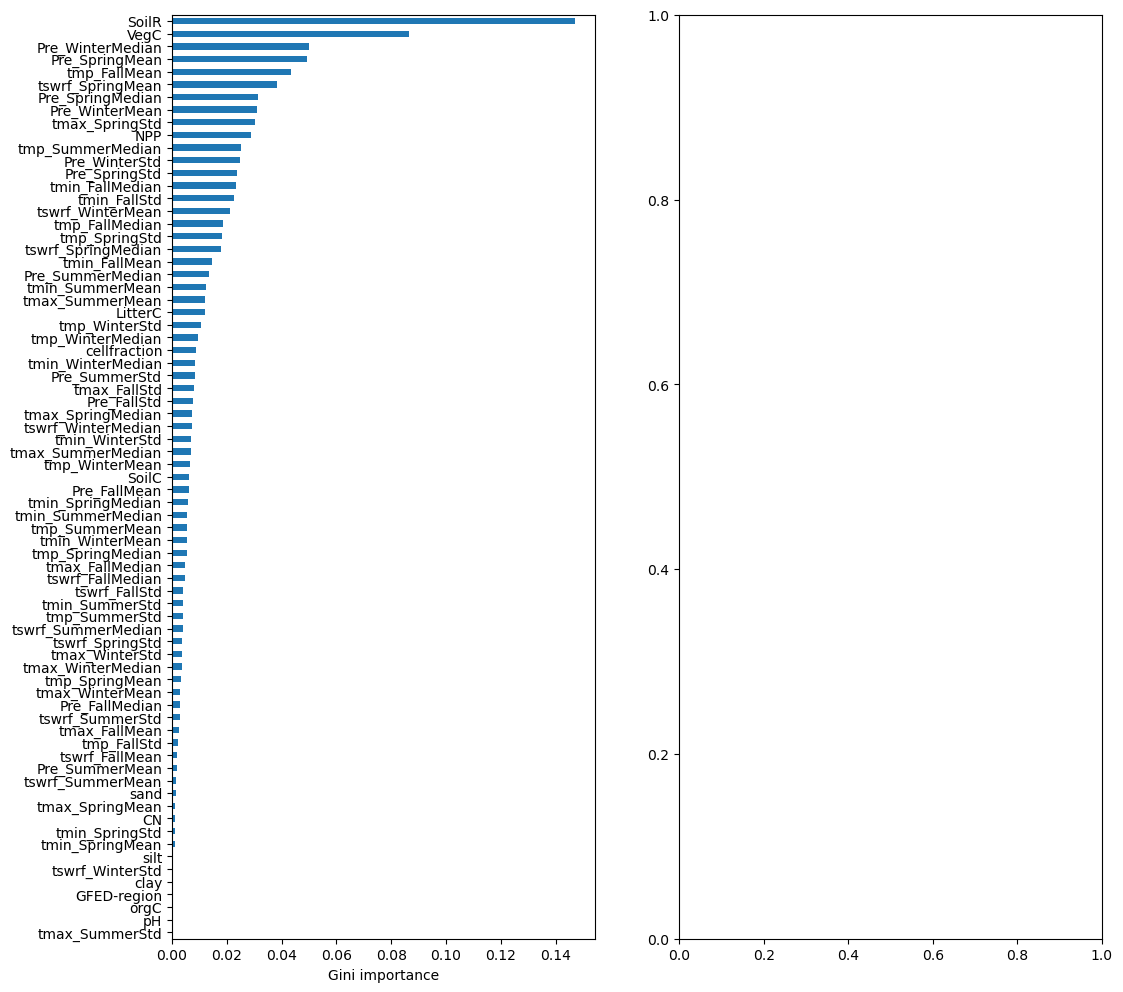

In [144]:
model_run()

Some evaluation of the model.

And now run the model whilst removing the medians

In [ ]:
features_median = [feature_name for feature_name in list(data_index_2) if feature_name[-6:]=='Median']
print(f'We dropped the features: {features_median}')

model_run(drop_columns=features_median)

Let's see how important the weather is.

In [ ]:
features_weather = [feature_name for feature_name in list(data_index_2) if \
                   re.search('Fall|Summer|Winter|Spring',feature_name)]
print(f'We dropped the features: {features_weather}')
display(Markdown('---'))

model_run(drop_columns=features_weather.copy())

Apparently not important at all. Now lets see if the model works only with weather data.

In [ ]:
print(f'We only use the features: {features_weather}')
display(Markdown('---'))

model_run(use_columns=features_weather)

## Section 4: Multiclass classification

As regions we chose:
- China for training
- Africa for testing

In [150]:
region_train_4 = data_index_2['Pan_2007'] == 'China'
region_test_4 = data_index_2['Pan_2007'] == 'Africa'

# these are the biomes that appear in the test region
biome_obs_list_4 = list(data_index_2.loc[region_train]['Biome_obs'].drop_duplicates())
biome_cmax_list_4 = list(data_index_2.loc[region_train]['Biome_Cmax'].drop_duplicates())

And now we run the simulation

length of training data: 3775
length of testing data: 7871
Max Depth:  10
Max Trees:  100
Max CV:  0.901566936408765
Accuracy of RandomForestClassifier on train data: 0.9844
Accuracy RandomForestClassifier on cross validation: 0.9041 ( 0.01)
Accuracy of RandomForestClassifier on test data: 0.2002


---
 The confusion table

Truth,5,6,7,9,11,12,13,14,15,16,17
Predicted,,,,,,,,,,,
5,2,1,0,0,0,3,0,0,1,0,0
6,4,77,1,0,16,39,1,16,69,2,4
7,0,6,2,23,0,0,0,0,0,0,0
9,0,5,0,1365,218,695,4,784,483,648,661
11,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0
15,0,2,0,0,0,407,0,413,123,381,1408


---
 Recall: proportion classified as True/ False of all True/Falls || [0,0]/ ([0,0] + [1,0]) || [1,1]/([0,1] + [1,1]

along coulumns 
F: 0.3333333333333333 
T: 0.8461538461538461


---
 Precission: proportion that werre True/ False of all samples predicted as True/ falls || [0,0]/ ([0,0] + [0,1]) || [1,1]/([1,0] + [1,1]

along rows 
F: 0.2857142857142857 
T: 0.33624454148471616


invalid value encountered in divide


---
 The feature importance

,importance
VegC,0.081612
NPP,0.073509
SoilR,0.054468
LitterC,0.043226
SoilC,0.039970
...,...
sand,0.001810
clay,0.001220
pH,0.001021
CN,0.000820


KeyboardInterrupt: 

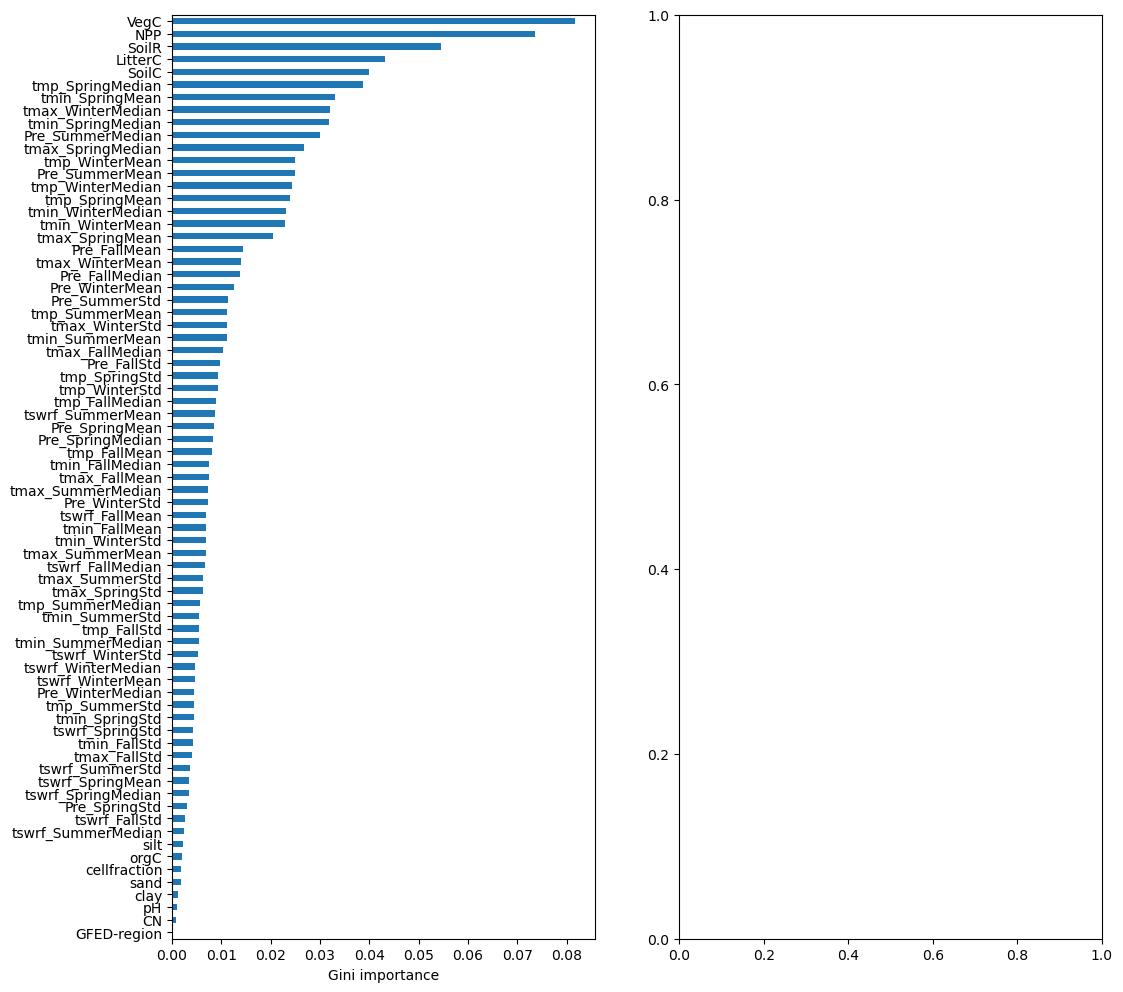

In [147]:
model_run(region_train=region_train_4, region_test=region_test_4, objective_list=biome_obs_list_4, hyperparameter_tuning=True)

Which is quite abysmal performance even with hyperparameter optimisation. Let's see if the model works better at classifying 'Biome_Cmax'.

length of training data: 3775
length of testing data: 5697
Max Depth:  10
Max Trees:  55
Max CV:  0.8986495160012634
Accuracy of RandomForestClassifier on train data: 0.9841
Accuracy RandomForestClassifier on cross validation: 0.8991 ( 0.01)
Accuracy of RandomForestClassifier on test data: 0.2714


---
 The confusion table

Truth,5,6,7,8,9,11,12,13,14,15,16,17
Predicted,,,,,,,,,,,,
5,2,1,0,0,1,0,2,0,0,2,0,0
6,4,78,1,3,0,12,102,0,52,94,24,11
7,0,6,2,14,27,1,0,1,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0
9,0,4,0,478,1360,39,306,1,298,90,292,305
11,0,0,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,0,0,0,0,0
14,0,0,0,0,0,0,0,0,0,0,0,0


---
 Recall: proportion classified as True/ False of all True/Falls || [0,0]/ ([0,0] + [1,0]) || [1,1]/([0,1] + [1,1]

along coulumns 
F: 0.3333333333333333 
T: 0.8571428571428571


---
 Precission: proportion that werre True/ False of all samples predicted as True/ falls || [0,0]/ ([0,0] + [0,1]) || [1,1]/([1,0] + [1,1]

along rows 
F: 0.25 
T: 0.2047244094488189


invalid value encountered in divide


---
 The feature importance

,importance
VegC,0.080253
NPP,0.067155
SoilR,0.056219
tmp_SpringMedian,0.047721
LitterC,0.047330
...,...
orgC,0.001569
clay,0.001352
CN,0.000904
pH,0.000825


---

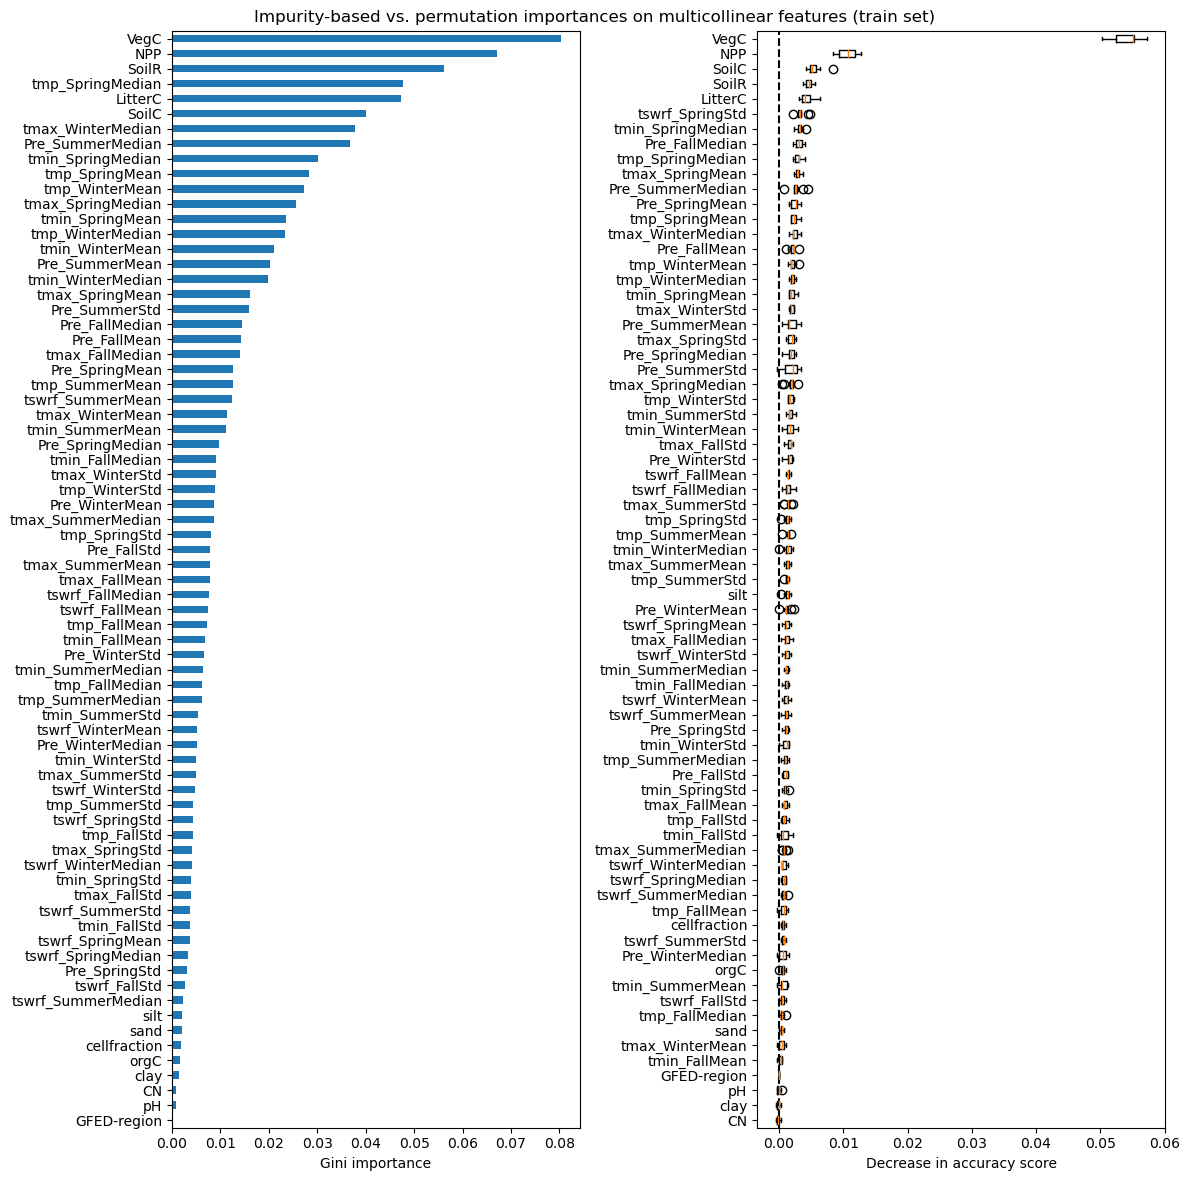

In [158]:
model_run(region_train=region_train_4, region_test=region_test_4, objective='Biome_Cmax' ,objective_list=biome_cmax_list_4, hyperparameter_tuning=True)

## Section 5: Regression 